# TP1 Proximal Denoising

* Authors: Mengda Li, Ségolène Martin

## Question 1
Show that this problem amounts to calculate the proximity operator of a
function in $\Gamma_0$.

**_Claim1.1_**: $f \circ L \in \Gamma_0$



**Proof**:
> 1. Right composition of a convex function by an ffine function is still convex (Proposition 8.20). Since $f \in \Gamma_0$ and $L$ is linear (so affine), $f \circ L$ is convex.
2.  Right composition of a lower semicontinuous function by a continuous function is still lower semicontinuous (Lemma 1.28). Since $f$ is lower semicontinuous and $L$ is continuous (linear and the dimension of its set of departure is finite), $f \circ L$ is lower semicontinuous.
3. $f \circ L$ is clearly proper.

As $f \circ L \in \Gamma_0$, Prox$_{f\circ L}: y \ \mapsto \ \underset{x}{\arg\min} f(Lx) + \frac{1}{2} \|x - y \|^2$ is our goal of optimization problem.

## Question 2
Check that this is also equivalent to calculate $L^{−1} Prox_f (Ly)$.

As $L$ is linear and continuous, $f \in \Gamma_0$, and $LL^* = Id$, (by Proposition 24.14) $Prox_{f \circ L} (y) = y + L^*(Prox_f(Ly) -Ly)$

\begin{align}
Prox_{f \circ L} (y) &= y + L^*(Prox_f(Ly) -Ly) \\
    & = y + L^*(Prox_f(Ly)) - y  \tag*{$(L^*L = Id)$}\\
    & = L^{-1}(Prox_f(Ly)) \tag*{$(L^* = L^{-1})$ }
\end{align}

## Question 3
Download the florence.jpg image. Add to this image a white Gaussian noise
with zero-mean and standard deviation equal to 30.

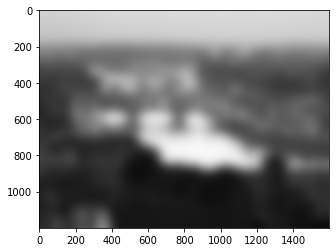

In [2]:
import imageio
im = imageio.imread('./florence.jpg')

from scipy.ndimage.filters import gaussian_filter
blurred = gaussian_filter(im, sigma=30)

import matplotlib.pyplot as plt
plt.imshow(blurred)

## Question 4

Compute the minimizer of (1) when L is a 2D orthonormal wavelet decomposition.